# 1. Precision & Recall

In [2]:
import pandas as pd

wine_url = "https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv"

wine = pd.read_csv(wine_url, index_col=0)
wine.head()

wine['taste'] = [1. if grade>5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr = LogisticRegression(solver='liblinear', random_state=13)
lr.fit(X_train, y_train)

y_pred_tr = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

print("Train ACC : ", accuracy_score(y_train, y_pred_tr))
print("Test ACC : ", accuracy_score(y_test, y_pred_test))

Train ACC :  0.7425437752549547
Test ACC :  0.7438461538461538


## classfication report

In [5]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



- 0.77 : 내가 1이라고 예상한 것 중, 진짜 1인것의 비율
- 0.84 : 실제 1중, 1이라고 맞춘 비율
    

- 0.68 : 내가 0이라고 예상한 것 중, 진짜 0인것의 비율
- 0.58 : 실제 0중, 0이라고 맞춘 비율


- macro avg : 각 클래스 별 precision, recall, f1-score 의 평균
                ex) precision의 경우, 0.73 = (0.68 + 0.77) / 2
- weighted avg : 개수의 비중...
                ex) precision의 경우, 0.74 = 0.68*(477/1300) + 0.77*(823/1300)

## confusion matrix


In [6]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, lr.predict(X_test))

array([[275, 202],
       [131, 692]], dtype=int64)

- 275, 202 : 전체 0 개수 중, 275개를 0으로, 202개를 1로 예측함
- 131, 692 : 전체 1 개수 중, 131개를 0으로, 692개를 1로 예측함   

## precision_recall curve

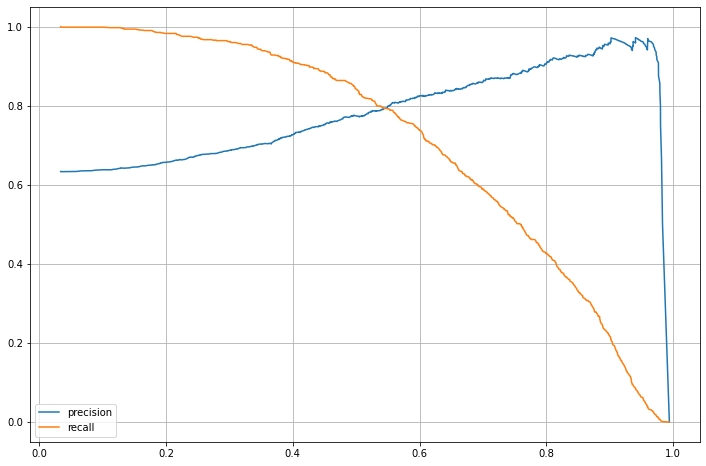

In [7]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
%matplotlib inline

plt.figure(figsize=(12, 8))
pred = lr.predict_proba(X_test)[:, 1]
precisions, recalls, thresholds = precision_recall_curve(y_test, pred)

plt.plot(thresholds, precisions[:len(thresholds)], label='precision')
plt.plot(thresholds, recalls[:len(thresholds)], label='recall')
plt.grid()
plt.legend()
plt.show()

- thresholds 값의 변화에 따른 precisions, recalls 값의 변화

In [10]:
# thresholds = 0.5

pred_proba = lr.predict_proba(X_test)
pred_proba[:3]

array([[0.40511422, 0.59488578],
       [0.50942858, 0.49057142],
       [0.1021066 , 0.8978934 ]])

- 왼쪽이 0일 확률, 오른쪽이 1일 확률

## pred_proba와 y_pred_test를 합치기

In [12]:
y_pred_test

array([1., 0., 1., ..., 1., 0., 1.])

In [14]:
y_pred_test.shape

(1300,)

In [11]:
y_pred_test.reshape(-1, 1)  # -1 : 마음대로 해라 / 설정값 없음

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [0.],
       [1.]])

In [15]:
y_pred_test.reshape(-1, 1).shape

(1300, 1)

In [13]:
import numpy as np

np.concatenate([pred_proba, y_pred_test.reshape(-1, 1)], axis=1)

array([[0.40511422, 0.59488578, 1.        ],
       [0.50942858, 0.49057142, 0.        ],
       [0.1021066 , 0.8978934 , 1.        ],
       ...,
       [0.2253031 , 0.7746969 , 1.        ],
       [0.67385289, 0.32614711, 0.        ],
       [0.31468732, 0.68531268, 1.        ]])

## threshold 변경 - Binarizer

In [17]:
from sklearn.preprocessing import Binarizer

binarizer = Binarizer(threshold=0.6).fit(pred_proba)   # pred_proba = lr.predict_proba(X_test)

In [21]:
binarizer.transform(pred_proba)

array([[0., 0.],
       [0., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

- 왼쪽이 0일 확률, 오른쪽이 1일 확률

In [22]:
pred_bin = binarizer.transform(pred_proba)[:, 1]  # 1일 확률만 추출 
pred_bin

array([0., 0., 1., ..., 1., 0., 1.])

In [25]:
print(classification_report(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.68      0.58      0.62       477
         1.0       0.77      0.84      0.81       823

    accuracy                           0.74      1300
   macro avg       0.73      0.71      0.71      1300
weighted avg       0.74      0.74      0.74      1300



In [26]:
print(classification_report(y_test, pred_bin))

              precision    recall  f1-score   support

         0.0       0.62      0.73      0.67       477
         1.0       0.82      0.74      0.78       823

    accuracy                           0.74      1300
   macro avg       0.72      0.73      0.72      1300
weighted avg       0.75      0.74      0.74      1300



- precision 은 오르고,   recall 낮아진 것을 볼수 있다.
- f1 값도 낮아졌다.


- 둘중 어느게 더 좋다고는 확답할수 없다.
- 그냥 threshold 변경 방법이 이렇다...